In [7]:
import wrangle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
df = wrangle.get_zillow()
df = wrangle.prep_zillow(df)
df = wrangle.remove_outliers(df)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"46,983.00","12,972,159.09","2,213,462.46","10,711,855.00","11,529,375.00","12,616,765.00","14,123,093.50","162,960,814.00"
bathrooms,"46,983.00",2.16,0.82,1.00,2.00,2.00,3.00,5.50
bedrooms,"46,983.00",3.24,0.87,1.00,3.00,3.00,4.00,6.00
sqft,"46,983.00","1,763.71",713.92,152.00,"1,244.00","1,597.00","2,136.00","5,363.00"
fullbathcnt,"46,983.00",2.10,0.80,1.00,2.00,2.00,3.00,5.00
latitude,"46,983.00",34.02,0.27,33.34,33.83,34.01,34.19,34.72
garagecarcnt,"46,983.00",0.66,0.94,0.00,0.00,0.00,2.00,9.00
garagesqft,"46,983.00",167.10,239.13,0.00,0.00,0.00,430.00,"2,720.00"
longitude,"46,983.00",-118.19,0.35,-119.48,-118.39,-118.14,-117.93,-117.55
lotsize,"46,983.00","7,226.95","3,190.01",236.00,"5,472.00","6,650.00","8,100.00","21,510.00"


In [28]:
df['abserror'] = abs(train.logerror)

<AxesSubplot:>

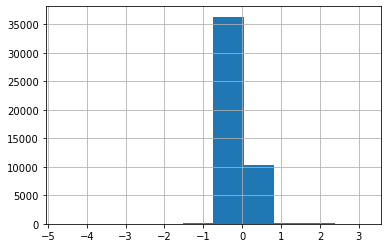

In [29]:
df.logerror.hist()

<AxesSubplot:>

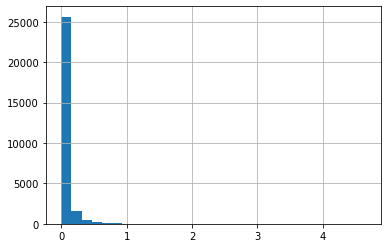

In [34]:
df.abserror.hist(bins=30)

In [35]:
train, validate, test = wrangle.my_split(df)

## is the (abs) log error for large garages significantly larger than the log error of all properties?

In [27]:
train[train.garagesqft > 800].abserror.mean()

0.032169719433884574

In [37]:
train.abserror.mean()

0.06932755433545618

97,319.00    680
97,318.00    568
97,328.00    499
97,329.00    492
97,118.00    464
            ... 
96,148.00      1
97,119.00      1
96,038.00      1
97,092.00      1
96,467.00      1
Name: regionidzip, Length: 377, dtype: int64

In [ ]:
sns.relplot(data=train)

<AxesSubplot:>

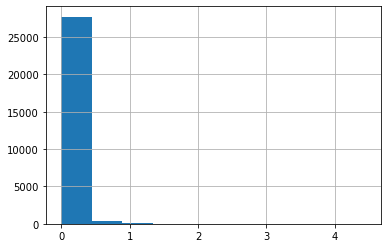

In [5]:
train.abserror.hist()

In [6]:
train['bigerror'] = np.where(train["abserror"] > 1, 1, 0)

In [7]:
big_error = train[train.bigerror == 1]

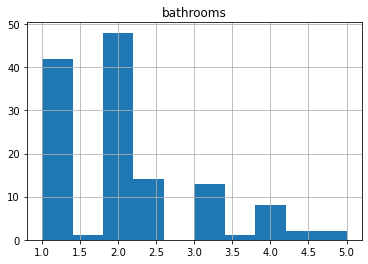

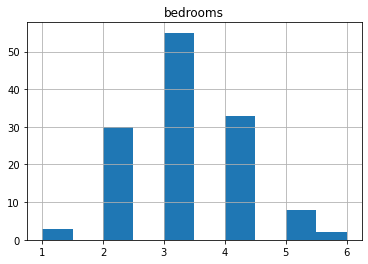

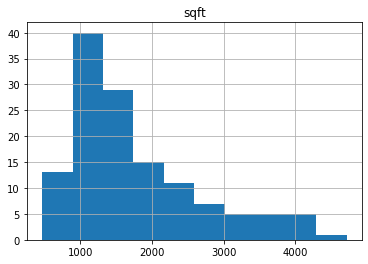

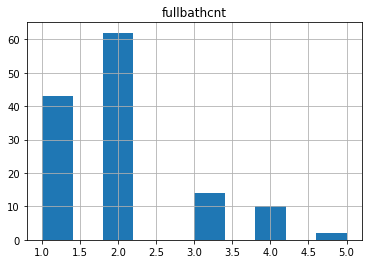

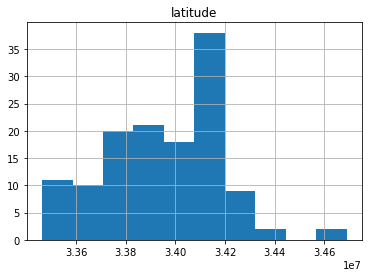

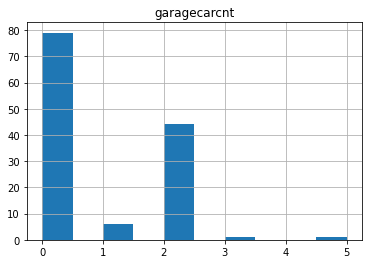

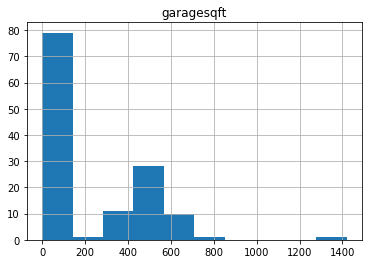

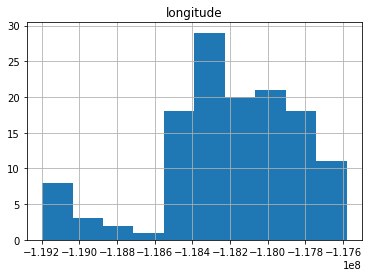

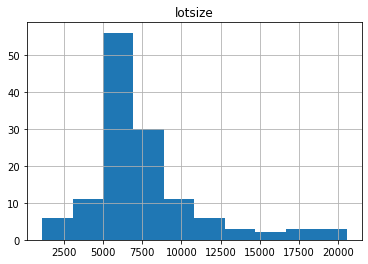

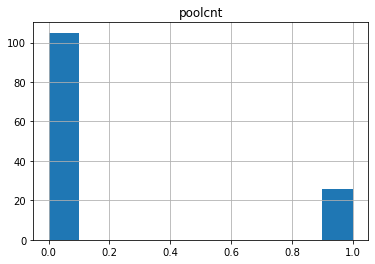

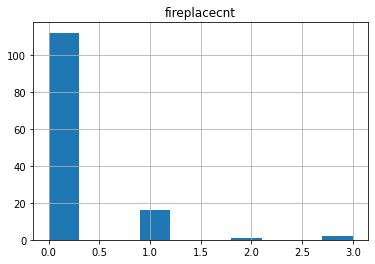

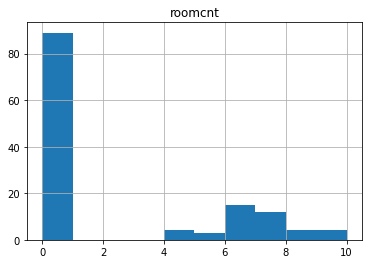

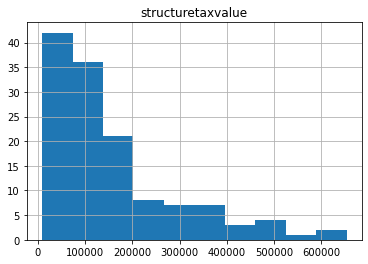

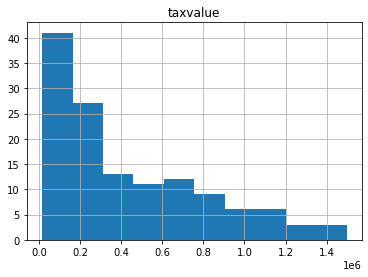

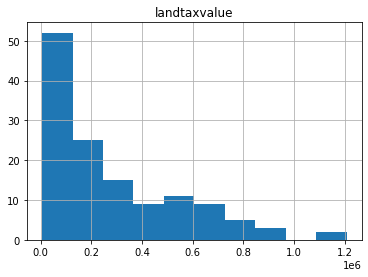

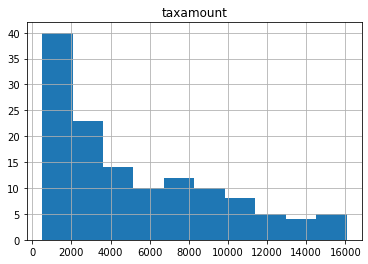

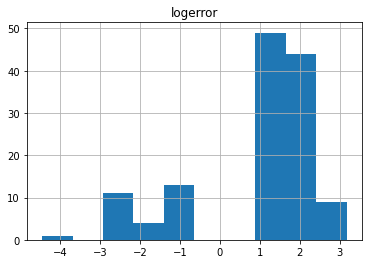

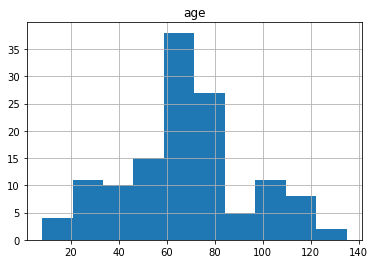

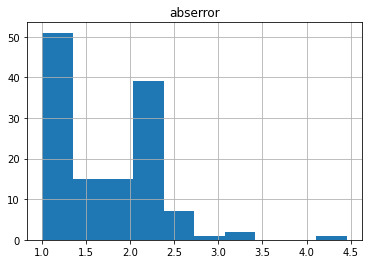

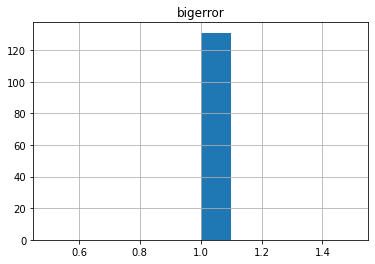

In [9]:
cols = ['bathrooms', 'bedrooms', 'sqft', 'fullbathcnt',
       'latitude', 'garagecarcnt', 'garagesqft', 'longitude', 'lotsize',
       'poolcnt', 'fireplacecnt', 'roomcnt',
       'structuretaxvalue', 'taxvalue', 'landtaxvalue', 'taxamount',
       'logerror', 'age', 'abserror', 'bigerror']

for col in cols:
    big_error[col].hist()
    plt.title(col)
    plt.show()

In [12]:
df.regionidzip.describe()

count              47,013.00
mean               96,611.88
std                 3,721.88
min                95,982.00
25%                96,212.00
50%                96,415.00
75%                96,996.00
max               399,675.00
Name: regionidzip, dtype: float64

In [38]:
train.latitude

23592                  34.03
39939                  34.16
30298                  33.91
27701                  33.93
7352                   34.01
                ...         
29985                  34.21
27724                  33.88
21224                  33.91
33458                  33.60
11863                  34.19
Name: latitude, Length: 28189, dtype: float64